# Análisis de paquetes

In [1]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
import import_ipynb
import utilsC as utilsC

importing Jupyter notebook from utilsC.ipynb


Graficar entropia a medida que llegan paquetes

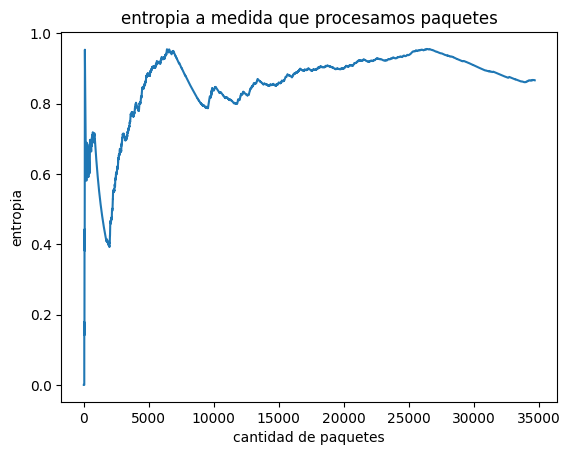

In [2]:
plt.plot(utilsC.get_entropy("cafeteria/fuente_ent_info_v4.txt"))
plt.title("entropia a medida que procesamos paquetes")
plt.xlabel("cantidad de paquetes")
plt.ylabel("entropia")
plt.show()

Análisis de la fuente final: 
 - Cantidad de Broadcast vs Unicast 

In [6]:
unicast_broadcast_symbol, protocol, percent_unicast, percent_broadcast = utilsC.show_source("cafeteria/fuente_final_sin_entropia.txt")
print("percent unicast", percent_unicast)
print("percent broadcast", percent_broadcast)

percent unicast 0.98083
percent broadcast 0.01917


[]

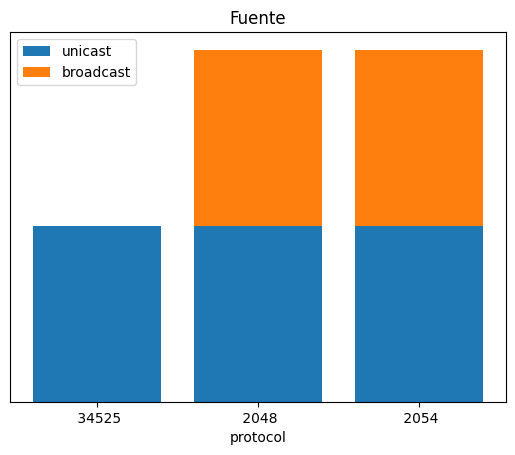

In [7]:
protocols_type_connection = list(zip(protocol, unicast_broadcast_symbol))
unicast = {d:int((d,'UNICAST') in protocols_type_connection) for d in protocol}
broadcast = {d:int((d,'BROADCAST') in protocols_type_connection) for d in protocol}

fig, ax = plt.subplots()
ax.bar(unicast.keys(), list(unicast.values()), label = "unicast")
ax.bar(broadcast.keys(), list(broadcast.values()), bottom=list(unicast.values()), label = "broadcast")
plt.xlabel("protocol")
ax.set_title("Fuente")
ax.legend()
ax.set_yticks([])